# 3장 정적 크롤링

<div style='font-size:20pt'>- BeautifulSoup<div>


-- HTML 및 XML 파일에서 데이터를 추출하기 위한 파이썬 라이브러리

In [1]:
# 설치
! pip install beautifulsoup4

In [2]:
# 호출 
from bs4 import BeautifulSoup as bs

-- HTML 및 XML파일을 읽어올때 다음 파서를 이용  
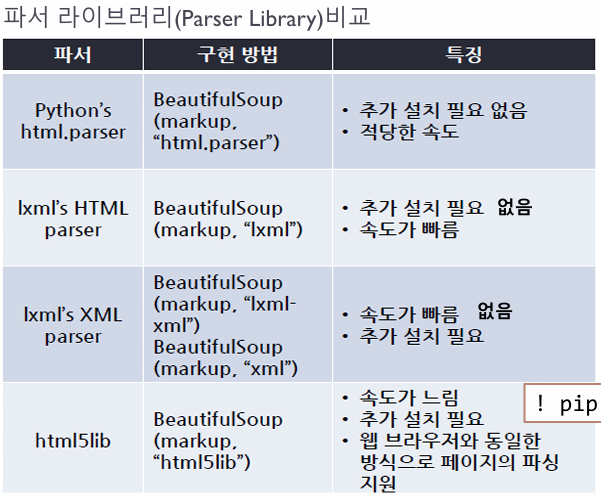

In [3]:
# 파서 라이브러리 설치(html5lib)
! pip install beautifulsoup4 html5lib

In [4]:
# 파싱 연습(sample.html 파일들 활용)
from bs4 import BeautifulSoup as bs

import requests
url = 'https://www.nate.com'
html = requests.get(url).text
#print(html)
soup = bs(html, 'html.parser')

#prettyfy() : 들여쓰기를 이용하여 html 코드를 보기 좋게 출력
#print(soup.prettify())

print(type(html))
print(type(soup))  

<class 'str'>
<class 'bs4.BeautifulSoup'>


In [5]:
webPage = open("data/sample01.html", "rt", encoding="utf-8").read()
#print(webPage)
soup = bs(webPage, 'html.parser')
print(soup)
#print(soup.prettify())
#print(soup.div)

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Test BeautifulSoup</title>
</head>
<body>
<p align="center">P태그의 컨텐트</p>
<img src="http://unico2013.dothome.co.kr/image/flower.jpg" width="300"/>
<img src="https://search.daum.net/nate?thr=sbma&amp;w=tot&amp;q=%EC%95%88%EC%9C%A0%EC%A7%84" width="300"/>
<ul>
<li>테스트1<strong>강조</strong></li>
<li>테스트2</li>
<li>테스트3</li>
</ul>
<ul>
<li> 한빛출판네트워크 </li>
<li> 비기너 </li>
<li> 데이터 분석 </li>
</ul>
</body>
</html>


In [6]:
# 4가지 파싱 라이브러리로 접근하는 방법
    # html.parser
bs1 = bs(webPage, 'html.parser')
    # lxml
bs2 = bs(webPage, 'lxml')
    # lxml-xml
bs3 = bs(webPage, 'lxml-xml')
        # 또는
bs4 = bs(webPage, 'xml')
    # html5lib
bs5 = bs(webPage, 'html5lib')

In [7]:
# 태그를 이용하여 접근하기
print(soup.body.ul.li.strong)
print(soup.strong)

<strong>강조</strong>
<strong>강조</strong>


In [8]:
# 태그 안의 글만 가져오기
print(soup.p)               # <p>태그 전체 가져오기
print(soup.p.string)        # 태그 안에 글을 가져오는 4가지 방법
print(soup.p.text)         
print(soup.p.get_text())    
print(soup.p.contents)      # 리스트 형태로 글을 가져옴

<p align="center">P태그의 컨텐트</p>
P태그의 컨텐트
P태그의 컨텐트
P태그의 컨텐트
['P태그의 컨텐트']


In [9]:
# string과 text의 차이
print(soup.li)
print(soup.li.string)       # 텍스트말고 다른 부분이 있으면 None으로 출력
print(soup.li.text)         # 텍스트만 골라 가져옴
print(soup.li.get_text())   # text와 같은 기능(호출방식만 다름)
print(soup.li.contents)     # 리스트 형태로 글을 가져옴

<li>테스트1<strong>강조</strong></li>
None
테스트1강조
테스트1강조
['테스트1', <strong>강조</strong>]


In [10]:
# string과 text의 차이2
print(soup.ul)
print(soup.ul.string)       # 텍스트말고 다른 부분이 있으면 None으로 출력
print(soup.ul.text)         # 텍스트만 골라 가져옴
print(soup.ul.get_text())   # text와 같은 기능(호출방식만 다름)
print(soup.ul.contents)     # 리스트 형태로 글을 가져옴
print(soup.ul.get_text(strip=True))     # 공백을 지우고 가져옴

<ul>
<li>테스트1<strong>강조</strong></li>
<li>테스트2</li>
<li>테스트3</li>
</ul>
None

테스트1강조
테스트2
테스트3


테스트1강조
테스트2
테스트3

['\n', <li>테스트1<strong>강조</strong></li>, '\n', <li>테스트2</li>, '\n', <li>테스트3</li>, '\n']
테스트1강조테스트2테스트3


In [11]:
# 태그의 속성값 가져오기
# print(soup)
print(soup.img)
print(soup.img['src'])              # src 속성만 뽑아옴
print(soup.img.attrs['src'])        # attrs를 이용하여 src 속성만 뽑아옴
print(soup.img.attrs)               # 모든 속성을 딕셔너리형태로 뽑아옴     

<img src="http://unico2013.dothome.co.kr/image/flower.jpg" width="300"/>
http://unico2013.dothome.co.kr/image/flower.jpg
http://unico2013.dothome.co.kr/image/flower.jpg
{'src': 'http://unico2013.dothome.co.kr/image/flower.jpg', 'width': '300'}


In [12]:
# img 하나 가져오기
img=soup.find("img")
print(img)
# img 여러개 가져오기 리스트로 가져옴
imgs=soup.find_all("img")
print(imgs)


<img src="http://unico2013.dothome.co.kr/image/flower.jpg" width="300"/>
[<img src="http://unico2013.dothome.co.kr/image/flower.jpg" width="300"/>, <img src="https://search.daum.net/nate?thr=sbma&amp;w=tot&amp;q=%EC%95%88%EC%9C%A0%EC%A7%84" width="300"/>]


In [13]:
# find_all() 함수 사용하기2
lis = soup.find_all("li")
print(lis)
for li in lis:
    print(li.text)

[<li>테스트1<strong>강조</strong></li>, <li>테스트2</li>, <li>테스트3</li>, <li> 한빛출판네트워크 </li>, <li> 비기너 </li>, <li> 데이터 분석 </li>]
테스트1강조
테스트2
테스트3
 한빛출판네트워크 
 비기너 
 데이터 분석 


In [14]:
# select() 함수 사용하기
print(soup.select("ul li"))
print('-----------------------')
print(soup.select("li")[0].text)
print(soup.select("li")[1].text)
print(soup.select("li")[2].text)
print(soup.select("li")[3].text)
print(soup.select("li")[4].text)
print(soup.select("li")[5].text)


[<li>테스트1<strong>강조</strong></li>, <li>테스트2</li>, <li>테스트3</li>, <li> 한빛출판네트워크 </li>, <li> 비기너 </li>, <li> 데이터 분석 </li>]
-----------------------
테스트1강조
테스트2
테스트3
 한빛출판네트워크 
 비기너 
 데이터 분석 


In [15]:
# select() 함수 사용하기2
p=soup.select_one("p")
print(p.text)

P태그의 컨텐트


In [16]:
# 복잡한 html속에서 원하는 부분만 가져오기
url = 'http://ticket.yes24.com/New/Genre/GenreMain.aspx?genre=15456&Gcode=009_202_001'
html_doc = requests.get(url).text
soup = bs(html_doc, 'html.parser')
# print(soup.prettify())

li_list= soup.select( "body > div.m2-kv-hidden > div.m2-kv-wrap > div > div > div" )
# 태그 뒤에 .클래스명을 붙이면 클래스명으로 검색
# 태그 뒤에 #아이디명을 붙이면 아이디명으로 검색
# 태그 뒤에 >태그명을 붙이면 자식태그만 검색
# 태그 뒤에 띄어쓰기를 하면 후손태그를 검색
# 태그 뒤에 :nth-child(숫자)를 붙이면 순서로 검색
# 태그 뒤에 [속성명=값]을 붙이면 속성으로 검색
# 태그 뒤에 :contains(값)을 붙이면 값으로 검색
# 태그 뒤에 :not(값)을 붙이면 값이 아닌 것을 검색
# 태그 뒤에 :eq(숫자)를 붙이면 순서로 검색
# 태그 뒤에 :gt(숫자)를 붙이면 순서보다 큰 것을 검색
# 태그 뒤에 :lt(숫자)를 붙이면 순서보다 작은 것을 검색
# 태그 뒤에 :first를 붙이면 첫번째 것을 검색
# 태그 뒤에 :last를 붙이면 마지막 것을 검색
# 등등 엄청 많음
for li in li_list:
    print(li.text)



뷰티풀 민트 라이프2025. 06. 13.~2025. 06. 15. 올림픽공원
마이진 전국투어 콘서트2025. 03.~2025. 04. 전국투어
HAVE A NICE DAY #112025. 04. 12.~2025. 04. 13. 인천 상상플랫폼
조용필&위대한탄생2025. 04. 05. 대전 컨벤션센터 제2전시장
2025 LOVESOME - 반 고흐, 영혼의 편지2025. 04. 26.~2025. 04. 27. 난지한강공원
2025 ATEEZ WORLD TOUR2025. 03. 22.~2025. 03. 23. KSPO DOME
2025 HIGHLIGHT FAN CON2025. 03. 08.~2025. 03. 09. 잠실실내체육관
DAY6 3RD WORLD TOUR〈FOREVER YOUNG〉2025. 02.~ 전국투어
박지현 콘서트 쇼맨쉽 ‘SHOWMANSHIP’2025. 03.~2025. 04. 전국투어
LOUD BRIDGE FESTIVAL2025. 04. 12.~2025. 04. 13. YES24 LIVE HALL
HIPHOPPLAYA FESTIVAL 20252025. 05. 03. 킨텍스 제2전시장 9홀, 10홀
THE GLOW 20252025. 03. 29.~2025. 03. 30. 킨텍스 제2전시장



In [17]:
# 교보문고 사이트에서 한번더 해보자(메인페이지는 스크립트때문에 안된다고 하심. 정확하게 왜인지는 이해 못했음.)
url = 'https://search.kyobobook.co.kr/search?keyword=%ED%8C%8C%EC%9D%B4%EC%8D%AC&gbCode=TOT&target=total'
html_doc = requests.get(url).text
soup = bs(html_doc, 'html.parser')
#print(soup.prettify())

items = soup.find_all("li", class_="prod_item")
#print(items)
for item in items:
    a_tag = item.find("a")
    print(a_tag.img['data-kbbfn-title'])


In [18]:
webPage = open("data/sample03.html", "rt", encoding="utf-8").read()
soup = bs(webPage, 'html.parser')
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <div id="myId1">
   아기공룡
  </div>
  <div class="myClass1">
   내 친구
  </div>
  <ul class="myClass2">
   <li>
    한빛아카데미
   </li>
   <li>
    한빛미디어
   </li>
  </ul>
  <a alt="다음" href="www.daum.net">
   다음 바로가기
  </a>
  <div class="myClass1">
   둘리
  </div>
  <ul>
   <li class="myClass3">
    비기너
   </li>
   <li class="myClass3">
    시리즈
   </li>
  </ul>
  <a href="www.nate.com">
   네이트 바로가기
  </a>
  <a href="www.naver.com">
   네이버 바로가기
  </a>
 </body>
</html>



In [19]:
import re 
# divs = soup.find_all("div", class_=re.compile("^my"))      # my로 시작하는 클래스명을 찾아라
divs = soup.find_all("div", class_=re.compile("ss1$"))      # ss1로 끝나는 클래스명을 찾아라

print(divs)
for div in divs:
    print(div.text)

[<div class="myClass1"> 내 친구 </div>, <div class="myClass1"> 둘리 </div>]
 내 친구 
 둘리 


In [20]:
# 여러개의 태그를 한번에 찾기
webPage = open("data/sample01.html", "rt", encoding="utf-8").read()
soup = bs(webPage, 'html.parser')
print(soup.prettify()) 

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   Test BeautifulSoup
  </title>
 </head>
 <body>
  <p align="center">
   P태그의 컨텐트
  </p>
  <img src="http://unico2013.dothome.co.kr/image/flower.jpg" width="300"/>
  <img src="https://search.daum.net/nate?thr=sbma&amp;w=tot&amp;q=%EC%95%88%EC%9C%A0%EC%A7%84" width="300"/>
  <ul>
   <li>
    테스트1
    <strong>
     강조
    </strong>
   </li>
   <li>
    테스트2
   </li>
   <li>
    테스트3
   </li>
  </ul>
  <ul>
   <li>
    한빛출판네트워크
   </li>
   <li>
    비기너
   </li>
   <li>
    데이터 분석
   </li>
  </ul>
 </body>
</html>



In [21]:
tags = soup.find_all(["p", "li"])
# print(tags)
for tag in tags:
    print(tag)

<p align="center">P태그의 컨텐트</p>
<li>테스트1<strong>강조</strong></li>
<li>테스트2</li>
<li>테스트3</li>
<li> 한빛출판네트워크 </li>
<li> 비기너 </li>
<li> 데이터 분석 </li>


In [22]:
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
data = {'stnId':'159'}
r = requests.get(url, params=data)
r.encoding = 'utf-8'
webPage = r.text
soup = bs(webPage, 'html.parser')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
 <channel>
  <title>
   기상청 육상 중기예보
  </title>
  <link/>
  http://www.kma.go.kr/weather/forecast/mid-term_06.jsp
  <description>
   기상청 날씨 웹서비스
  </description>
  <language>
   ko
  </language>
  <generator>
   기상청
  </generator>
  <pubdate>
   2025년 03월 05일 (수)요일 06:00
  </pubdate>
  <item>
   <author>
    기상청
   </author>
   <category>
    육상중기예보
   </category>
   <title>
    경상남,북도 육상 중기예보 - 2025년 03월 05일 (수)요일 06:00 발표
   </title>
   <link/>
   http://www.kma.go.kr/weather/forecast/mid-term_06.jsp
   <guid>
    http://www.kma.go.kr/weather/forecast/mid-term_06.jsp
   </guid>
   <description>
    <header>
     <title>
      경상남,북도 육상중기예보
     </title>
     <tm>
      202503050600
     </tm>
     <wf>
      <![CDATA[○ (강수) 11일(화) 오전에 비가 내리겠습니다.<br />○ (기온) 아침 최저기온은 -2~9도로 평년(최저기온 -3~5도)과 비슷하거나 높겠습니다.<br />          낮 최고기온은 9일(일)~13일(목)에 13~18도로 평년(최고기온 11~14도)과 비슷하거나 높겠고 14일(금)~15일(토)에 11~13도로 평년(최고기온 11~13도)보다 조금 낮겠습니다. <br

c:\Users\admin\anaconda3\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [23]:
list1 = []
loc = soup.find_all("location")
for l in loc:
    city = l.city.string
    datas = l.find_all("data")
    for d in datas:
        tmef = d.tmef.string
        wf = d.wf.string
        tmn = d.tmn.string
        tmx = d.tmx.string
        print(city, tmef, wf, tmn, tmx)
        list1.append((city, tmef, wf, tmn, tmx))
print(list1)


부산 2025-03-09 00:00 맑음 5 13
부산 2025-03-09 12:00 구름많음 5 13
부산 2025-03-10 00:00 구름많음 7 13
부산 2025-03-10 12:00 흐림 7 13
부산 2025-03-11 00:00 흐리고 비 8 15
부산 2025-03-11 12:00 구름많음 8 15
부산 2025-03-12 00:00 구름많음 8 15
부산 2025-03-12 12:00 구름많음 8 15
부산 2025-03-13 00:00 흐림 9 14
부산 2025-03-14 00:00 구름많음 9 14
부산 2025-03-15 00:00 구름많음 6 12
울산 2025-03-09 00:00 맑음 2 13
울산 2025-03-09 12:00 구름많음 2 13
울산 2025-03-10 00:00 구름많음 4 14
울산 2025-03-10 12:00 흐림 4 14
울산 2025-03-11 00:00 흐리고 비 6 17
울산 2025-03-11 12:00 구름많음 6 17
울산 2025-03-12 00:00 구름많음 5 16
울산 2025-03-12 12:00 구름많음 5 16
울산 2025-03-13 00:00 흐림 7 14
울산 2025-03-14 00:00 구름많음 7 14
울산 2025-03-15 00:00 구름많음 5 12
창원 2025-03-09 00:00 맑음 3 14
창원 2025-03-09 12:00 구름많음 3 14
창원 2025-03-10 00:00 구름많음 5 14
창원 2025-03-10 12:00 흐림 5 14
창원 2025-03-11 00:00 흐리고 비 7 17
창원 2025-03-11 12:00 구름많음 7 17
창원 2025-03-12 00:00 구름많음 6 16
창원 2025-03-12 12:00 구름많음 6 16
창원 2025-03-13 00:00 흐림 6 15
창원 2025-03-14 00:00 구름많음 6 15
창원 2025-03-15 00:00 구름많음 6 13
진주 2025-03-09 00:00 맑음 -1

In [24]:
import pandas as pd 
df = pd.DataFrame(list1, columns=['city', 'tmef', 'wf', 'tmn', 'tmx'])
df.to_csv("data/weather.csv", index=False, encoding='utf-8-sig')    

In [25]:
# 알라딘으로 다시 한번 연습하기
url = 'https://www.yes24.com/Product/Search?domain=ALL&query=%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC'
html_doc = requests.get(url).text
soup = bs(html_doc, 'html.parser')
#print(soup.prettify())

books = soup.select("#yesSchList > li")
list2 = []

for book in books:
    
    title = book.select_one("#yesSchList > li > div > div.item_info > div.info_row.info_name > a.gd_name")
    title_txt = ''
    if title is not None:
        title_text = title.text
    author = book.select_one("#yesSchList > li > div > div.item_info > div.info_row.info_pubGrp > span.authPub.info_auth > a")
    author_txt = ''
    if author is not None:
        author_text = author.text    
    publish = book.select_one("#yesSchList > li > div > div.item_info > div.info_row.info_pubGrp > span.authPub.info_pub > a")
    publish_txt = ''
    if publish is not None:
        publish_text = publish.text
    price = book.select_one("#yesSchList > li > div > div.item_info > div.info_row.info_price > strong > em")
    prise_txt = ''
    if price is not None:
        prise_text = int(price.text.replace(',',''))
    score = book.select_one("#yesSchList > li > div > div.item_info > div.info_row.info_rating > span.rating_grade > em")
    score_txt = 0.0
    if score is not None:
        score_text = float(score.text)

    list2.append((title_text, author_text, publish_text, prise_text, score_text))

import pandas as pd 
df = pd.DataFrame(list2, columns=['title', 'author', 'publish', 'price', 'score'])
df.to_csv("data/books.csv", index=False, encoding='utf-8-sig') 
df


,title,author,publish,price,score
0,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,19800,9.8
1,혼자 만들면서 공부하는 파이썬,문현일,한빛미디어,23400,10.0
2,혼자 공부하는 파이썬,윤인성,한빛미디어,19800,9.5
3,두근두근 파이썬,천인국,생능출판사,25000,5.0
4,밑바닥부터 시작하는 딥러닝 1,사이토 고키,한빛미디어,23400,9.2
5,파이썬 업무 자동화 일잘러 되기 + 챗GPT,메이허,골든래빗,32400,9.2
6,대표 전략으로 입문하는 미국 주식 퀀트 투자,이용환,프리렉,27000,9.8
7,파이썬으로 웹 크롤러 만들기,라이언 미첼,한빛미디어,25200,9.8
8,진짜 업무에 쓰는 챗GPT 노코드 데이터 분석,이기복,디지털북스,29700,10.0
9,혼자 공부하는 머신러닝+딥러닝,박해선,한빛미디어,23400,9.6


In [26]:
! pip install pymysql
import pymysql
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    db='pydb',
    charset='utf8')
cursor = conn.cursor()

In [27]:
# 데이터 조회(select)
def select_all():
    conn = pymysql.connect(
        host='localhost',
        user = 'root', 
        password = '1234',
        db = 'pydb',
        charset = 'utf8')
    cursor = conn.cursor()
    sql = "select * from books"
    cursor.execute(sql)
    books = cursor.fetchall()
    for book in books:
        print(book)
    conn.close()
select_all()

In [28]:
# 여러데이터 입력
def insert_datas(datas):
    conn = pymysql.connect(
        host='localhost',
        user='root',
        password='1234',  
        db='pydb',
        charset='utf8')
    cursor = conn.cursor()
    sql = "insert into books(title, author, publish, price, score) values (%s, %s, %s, %s, %s)"
    cursor.executemany(sql, datas)
    conn.commit()
    conn.close()

insert_datas(list2)

In [ ]:
select_all()

#교재 p177~185까지 + db에 저장까지 연습해서 메일보내기

('2025 시대에듀 빅데이터분석기사 실기(파이썬) 한권으로 끝내기', '장희선', '시대고시기획 시대교육', 30600, 10.0)
('2025 최적합 빅데이터분석기사 실기 (파이썬)', '김민지', '성안당', 27000, 10.0)
('Do it! 점프 투 파이썬', '박응용', '이지스퍼블리싱', 19800, 9.8)
('Streamlit 으로 프로젝트 한방에 끝내기 With 파이썬', 'Sara', 'BOOKK(부크크)', 60700, 10.0)
('대표 전략으로 입문하는 미국 주식 퀀트 투자', '이용환', '프리렉', 27000, 9.8)
('두근두근 파이썬', '천인국', '생능출판사', 25000, 5.0)
('마이크로 파이썬으로 만드는 드론과 사물인터넷', '장문철', '먼슬리북스', 19800, 10.0)
('마이크로 파이썬으로 만드는 스마트 자동차', '장문철', '먼슬리북스', 19800, 10.0)
('밑바닥부터 시작하는 딥러닝 1', '사이토 고키', '한빛미디어', 23400, 9.2)
('비전공자가 배우는 파이썬', '이성만', 'BOOKK(부크크)', 27700, 10.0)
('실전 코드부터 배우는 실무 활용 파이썬 with 챗GPT', '박찬의', '아이콕스(iCox)', 19800, 9.8)
('야구 데이터로 배우는 파이썬', '사이토 아마네', '영진닷컴', 16200, 9.4)
('정말 쉽네? 챗GPT 구글 업무 자동화 + 이게 되네? 업무 자동화 미친 활용 앱스 스크립트 with 챗GPT + 파이썬 업무 자동화 일잘러 되기 + 챗GPT 세트', '서휘승', '골든래빗', 82800, 10.0)
('진짜 업무에 쓰는 챗GPT 노코드 데이터 분석', '이기복', '디지털북스', 29700, 10.0)
('최신 파이썬 완전정복 : 기초에서 심화까지', '강환수', '홍릉', 34000, 9.6)
('친절한 파이썬 프로그래밍', '서정만', '글로벌', 25200, 10.0)
('코딩 자율학습 나도코딩의 파이썬 입문', '나도